**Requirements:**
1. You have 7 days to report on the assignment
2. Please use python to solve this exercise. You can use libraries such as: sqlalchemy, pandas, or any other packages of your choice that can help you work on the assignments
3. For visualizations, please use python and its common libraries
4. When you are prompted to use sql, please use sqlalchemy for that assignment

**Deliverables:**
1. Python Jupyter notebook with your code (please comment the code! this let us follow your thought process)
2. In addition, also save your notebooks in .html file and attach it with the actual code

**What are we looking for:**
1. Story from the data (Completeness of analysis/ story)
2. There is no right solution to this assignment
3. Your thought process (Be precise, straight to the point, and remember to comment the code)
4. The rationale behind the decisions you made (Provide justifications to your recommendations)

In [ ]:
import numpy as np
import pandas as pd
import sqlalchemy as sa
path = 'data/'

We have already prepared a database for you to query from

In [ ]:
 # Create SQL Alchemy Engine
engine = sa.create_engine('sqlite:///database.db')

In [ ]:
# Import data as pd.DataFrame
application_df = pd.read_csv('application.csv')
loan_df = pd.read_csv('loan.csv')
payment1_df = pd.read_csv('payment1.csv')
payment2_df = pd.read_csv('payment2.csv')

In [ ]:
# Insert data from pd.DataFrame to SQL Alchemy Engine
application_df.to_sql(name='application', con=engine,if_exists='replace')
loan_df.to_sql(name='loan', con=engine,if_exists='replace')
payment1_df.to_sql(name='payment1', con=engine,if_exists='replace')
payment2_df.to_sql(name='payment2', con=engine,if_exists='replace')

In [ ]:
def query_from_db(sql_long_string, engine):
    """
    Execute SQL Statement and return the queried data as a pandas.DataFrame object

    :param sql_long_string: SQL statement
    :param engine: SQL Alchemy engine
    """
    statement = engine.execute(sql_long_string)
    df = pd.DataFrame(statement.fetchall())
    df.columns = statement.keys()
    return df

### Assignment 1 - Data Preparation and Cleaning

Please do all these tasks in SQL query.
1. Combine all the tables into a single dataframe.
2. Do you notice anything suspicious with the dataframe? If yes, please do a preliminary analysis and fix it. Explain what you found and how you fix it.
3. Do you see any outliers? Explain how do you detect the outlier and how you fix it.
4. Provide your assumptions on the data.

**Application Table**
-> preposesing data pada tabel "Application"

In [ ]:
app_query = """
    SELECT * FROM application
    WHERE 1 = 1
"""
df_app=pd.read_sql_query(app_query, engine)
# df_app.info()

In [ ]:
df_app['application_id'] = df_app['application_id'].astype('string')
df_app['customer_id'] = df_app['customer_id'].astype("Int64")
df_app['cdate'] = df_app['cdate'].astype('string')
df_app['loan_purpose'] = df_app['loan_purpose'].astype('string')
df_app['loan_purpose_desc'] = df_app['loan_purpose_desc'].astype('string')
df_app['dob'] = df_app['dob'].astype('string')
df_app['address_provinsi'] = df_app['address_provinsi'].astype('string')
df_app['marital_status'] = df_app['marital_status'].astype('string')
df_app['job_type'] = df_app['job_type'].astype('string')
df_app['job_industry'] = df_app['job_industry'].astype('string')

In [ ]:
df_app['customer_id'] = df_app['customer_id'].astype('string')

In [ ]:
###CHECK MISSING VALUE###
for column in df_app.columns:
    if df_app[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(df_app[column].isnull().sum() /
                                               df_app[column].shape[0]))

cdate : 8.65%
customer_id : 9.26%
loan_purpose : 11.27%
loan_purpose_desc : 10.87%
dob : 8.85%
address_provinsi : 11.67%
marital_status : 10.06%
dependent : 10.66%
job_type : 11.47%
job_industry : 9.66%


In [ ]:
###HANDLE MISSING VALUE###
df_app=df_app.dropna(subset=['application_id'])
df_app=df_app.dropna(subset=['customer_id'])
# df_app

In [ ]:
# Insert data from pd.DataFrame to SQL Alchemy Engine
df_app.to_sql(name='df_app', con=engine,if_exists='replace')

**Loan Table**
-> preposesing data pada tabel "Loan"

In [ ]:
loan_query = """
    SELECT
    cast(loan_id as int64) as loan_id,
    loan_amount,
    loan_duration,
    installment_amount,
    fund_transfer_ts,
    cast(application_id as int64) as application_id
    FROM loan
    WHERE 1 = 1
"""
df_loan=pd.read_sql_query(loan_query, engine)
# df_loan.info()

In [ ]:
df_loan['loan_id'] = df_loan['loan_id'].astype('Int64')
df_loan['application_id'] = df_loan['application_id'].astype('Int64')
df_loan['fund_transfer_ts'] = df_loan['fund_transfer_ts'].astype('string')

In [ ]:
df_loan['loan_id'] = df_loan['loan_id'].astype('string')
df_loan['application_id'] = df_loan['application_id'].astype('string')

In [ ]:
###CHECK MISSING VALUE###
for column in df_loan.columns:
    if df_loan[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(df_loan[column].isnull().sum() /
                                               df_loan[column].shape[0]))

loan_id : 1.72%
loan_amount : 1.97%
loan_duration : 1.93%
installment_amount : 1.95%
fund_transfer_ts : 2.10%
application_id : 2.33%


In [ ]:
###HANDLE MISSING VALUE###
df_loan=df_loan.dropna(subset=['application_id'])
df_loan=df_loan.dropna(subset=['loan_id'])

In [ ]:
# Insert data from pd.DataFrame to SQL Alchemy Engine
df_loan.to_sql(name='df_loan', con=engine,if_exists='replace')

**Payment 1 Table**
-> preposesing data pada tabel "Payment 1"

In [ ]:
pay1_query = """
    SELECT * FROM payment1
    WHERE 1 = 1
"""
df_pay1=pd.read_sql_query(pay1_query, engine)
# df_pay1

In [ ]:
df_pay1['payment_id'] = df_pay1['payment_id'].astype('string')
df_pay1['loan_id'] = df_pay1['loan_id'].astype('Int64')
df_pay1['due_date'] = df_pay1['due_date'].astype('string')
df_pay1['paid_date'] = df_pay1['paid_date'].astype('string')

In [ ]:
df_pay1['loan_id'] = df_pay1['loan_id'].astype('string')

In [ ]:
###CHECK MISSING VALUE###
for column in df_pay1.columns:
    if df_pay1[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(df_pay1[column].isnull().sum() /
                                               df_pay1[column].shape[0]))

payment_number : 1.89%
due_date : 2.23%
due_amount : 1.93%
paid_date : 31.97%
paid_amount : 2.10%
loan_id : 1.98%
dpd : 33.53%


In [ ]:
###HANDLE MISSING VALUE###
df_pay1=df_pay1.dropna(subset=['loan_id'])
# df_pay1=df_pay1.dropna(subset=['payment_number'])
# df_pay1=df_pay1.dropna(subset=['due_date'])
# df_pay1=df_pay1.dropna(subset=['due_amount'])
# df_pay1=df_pay1.dropna(subset=['paid_date'])
# df_pay1=df_pay1.dropna(subset=['paid_amount'])
# df_pay1.info()

In [ ]:
# Insert data from pd.DataFrame to SQL Alchemy Engine
df_pay1.to_sql(name='df_pay1', con=engine,if_exists='replace')

**Combine the Table**
tahap ini kita menggabungkan seluruh atribut data, kemudian kita masih memerlukan sedikit preposesing data, yaitu "replace missing value"

In [ ]:
df_merge = """
    SELECT a.cdate,
          a.application_id,
          a.customer_id,
          a.loan_purpose,
          a.dob,
          a.address_provinsi,
          a.marital_status,
          a.dependent,
          a.job_type,
          a.job_industry,
          l.loan_id,
          l.loan_amount,
          l.loan_duration,
          l.installment_amount,
          l.fund_transfer_ts,
          p.payment_id,
          p.payment_number,
          p.due_date,
          p.due_amount,
          p.paid_date,
          p.paid_amount,
          p.dpd
    FROM df_app a
    LEFT JOIN df_loan l ON a.application_id = l.application_id
    LEFT JOIN df_pay1 p ON l.loan_id = p.loan_id
    -- where due_date is not null and paid_date is null
"""
df_merge=pd.read_sql_query(df_merge, engine)
df_merge

,cdate,application_id,customer_id,loan_purpose,dob,address_provinsi,marital_status,dependent,job_type,job_industry,...,loan_duration,installment_amount,fund_transfer_ts,payment_id,payment_number,due_date,due_amount,paid_date,paid_amount,dpd
0,2021-01-07 13:45:43.876693+00:00,2004025695250,2003023548799,Modal usaha,2000-01-06,Banten,Lajang,1.0,Pegawai swasta,Admin / Finance / HR,...,5.0,140000.0,2021-01-24 12:17:45.317242+00:00,2006022009983,1.0,2021-03-02,0.0,2021-04-02,149000.0,31.0
1,2021-01-07 13:45:43.876693+00:00,2004025695250,2003023548799,Modal usaha,2000-01-06,Banten,Lajang,1.0,Pegawai swasta,Admin / Finance / HR,...,5.0,140000.0,2021-01-24 12:17:45.317242+00:00,2006022009984,2.0,2021-04-02,0.0,2021-05-16,195000.0,44.0
2,2021-01-07 13:45:43.876693+00:00,2004025695250,2003023548799,Modal usaha,2000-01-06,Banten,Lajang,1.0,Pegawai swasta,Admin / Finance / HR,...,5.0,140000.0,2021-01-24 12:17:45.317242+00:00,2006022009985,3.0,2021-05-02,NaN,2021-05-30,140000.0,28.0
3,2021-01-07 13:45:43.876693+00:00,2004025695250,2003023548799,Modal usaha,2000-01-06,Banten,Lajang,1.0,Pegawai swasta,Admin / Finance / HR,...,5.0,140000.0,2021-01-24 12:17:45.317242+00:00,2006022009986,4.0,2021-06-02,0.0,2021-07-06,140000.0,34.0
4,2021-01-07 13:45:43.876693+00:00,2004025695250,2003023548799,Modal usaha,2000-01-06,Banten,Lajang,1.0,Pegawai swasta,Admin / Finance / HR,...,5.0,140000.0,2021-01-24 12:17:45.317242+00:00,2006022009987,5.0,None,0.0,2021-08-02,140000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,2021-03-24 05:31:55.764238+00:00,2004026221387,2003023660704,Kebutuhan sehari-hari,1997-09-22,None,Lajang,0.0,Pegawai swasta,Kesehatan,...,4.0,95000.0,2022-02-01 01:35:34.133097+00:00,2006055587457,3.0,2022-05-30,95000.0,None,NaN,NaN
15077,2021-03-24 05:31:55.764238+00:00,2004026221387,2003023660704,Kebutuhan sehari-hari,1997-09-22,None,Lajang,0.0,Pegawai swasta,Kesehatan,...,4.0,95000.0,2022-02-01 01:35:34.133097+00:00,2006055587458,4.0,2022-06-30,95000.0,None,0.0,NaN
15078,2021-03-24 05:31:55.764238+00:00,2004026221387,2003023660704,Kebutuhan sehari-hari,1997-09-22,None,Lajang,0.0,Pegawai swasta,Kesehatan,...,3.0,81000.0,2022-02-14 00:23:35.417621+00:00,2006057339878,1.0,2022-03-30,85000.0,None,0.0,NaN
15079,2021-03-24 05:31:55.764238+00:00,2004026221387,2003023660704,Kebutuhan sehari-hari,1997-09-22,None,Lajang,0.0,Pegawai swasta,Kesehatan,...,3.0,81000.0,2022-02-14 00:23:35.417621+00:00,2006057339879,2.0,2022-04-30,NaN,None,0.0,NaN


In [ ]:
###CHECK MISSING VALUE###
for column in df_merge.columns:
    if df_merge[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(df_merge[column].isnull().sum() /
                                               df_merge[column].shape[0]))

cdate : 11.78%
loan_purpose : 12.28%
dob : 8.55%
address_provinsi : 9.46%
marital_status : 12.23%
dependent : 12.59%
job_type : 10.19%
job_industry : 7.79%
loan_id : 0.01%
loan_amount : 1.91%
loan_duration : 1.98%
installment_amount : 2.29%
fund_transfer_ts : 2.14%
payment_id : 0.09%
payment_number : 2.00%
due_date : 2.34%
due_amount : 2.04%
paid_date : 32.46%
paid_amount : 2.21%
dpd : 34.04%


In [ ]:
df_merge['dependent'] = pd.Categorical(df_merge.dependent)
df_merge['loan_duration'] = pd.Categorical(df_merge.loan_duration)
df_merge['payment_number'] = pd.Categorical(df_merge.payment_number)

In [ ]:
df_merge['cdate'] = pd.to_datetime(df_merge.cdate,format='%Y-%m-%d')
df_merge['dob'] = pd.to_datetime(df_merge.dob,format='%Y-%m-%d')
df_merge['fund_transfer_ts'] = pd.to_datetime(df_merge.fund_transfer_ts,format='%Y-%m-%d')
df_merge['due_date'] = pd.to_datetime(df_merge.due_date,format='%Y-%m-%d')
df_merge['paid_date'] = pd.to_datetime(df_merge.paid_date,format='%Y-%m-%d')

In [ ]:
df_merge['cdate'] = df_merge['cdate'].dt.date
df_merge['fund_transfer_ts'] = df_merge['fund_transfer_ts'].dt.date

In [ ]:
df_merge['cdate'] = pd.to_datetime(df_merge.cdate,format='%Y-%m-%d')
df_merge['fund_transfer_ts'] = pd.to_datetime(df_merge.fund_transfer_ts,format='%Y-%m-%d')
# df_merge.info()

In [ ]:
# ##REPLACE MISSING VALUE WITH 0###
df_merge[['loan_amount','installment_amount','due_amount','paid_amount','dpd']] = df_merge[['loan_amount','installment_amount','due_amount','paid_amount','dpd']].fillna(0)

In [ ]:
# ###REPLACE MISSING VALUE WITH MODE###
# df_merge['dependent'] = df_merge['dependent'].fillna(df_merge['dependent'].mode()[0])
# df_merge['loan_duration'] = df_merge['loan_duration'].fillna(df_merge['loan_duration'].mode()[0])
# df_merge['payment_number'] = df_merge['payment_number'].fillna(df_merge['payment_number'].mode()[0])

In [ ]:
###CHECK MISSING VALUE###
for column in df_merge.columns:
    if df_merge[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(df_merge[column].isnull().sum() /
                                               df_merge[column].shape[0]))

cdate : 11.78%
loan_purpose : 12.28%
dob : 8.55%
address_provinsi : 9.46%
marital_status : 12.23%
dependent : 12.59%
job_type : 10.19%
job_industry : 7.79%
loan_id : 0.01%
loan_duration : 1.98%
fund_transfer_ts : 2.14%
payment_id : 0.09%
payment_number : 2.00%
due_date : 2.34%
paid_date : 32.46%


In [ ]:
df_merge

,cdate,application_id,customer_id,loan_purpose,dob,address_provinsi,marital_status,dependent,job_type,job_industry,...,loan_duration,installment_amount,fund_transfer_ts,payment_id,payment_number,due_date,due_amount,paid_date,paid_amount,dpd
0,2021-01-07,2004025695250,2003023548799,Modal usaha,2000-01-06,Banten,Lajang,1.0,Pegawai swasta,Admin / Finance / HR,...,5.0,140000.0,2021-01-24,2006022009983,1.0,2021-03-02,0.0,2021-04-02,149000.0,31.0
1,2021-01-07,2004025695250,2003023548799,Modal usaha,2000-01-06,Banten,Lajang,1.0,Pegawai swasta,Admin / Finance / HR,...,5.0,140000.0,2021-01-24,2006022009984,2.0,2021-04-02,0.0,2021-05-16,195000.0,44.0
2,2021-01-07,2004025695250,2003023548799,Modal usaha,2000-01-06,Banten,Lajang,1.0,Pegawai swasta,Admin / Finance / HR,...,5.0,140000.0,2021-01-24,2006022009985,3.0,2021-05-02,0.0,2021-05-30,140000.0,28.0
3,2021-01-07,2004025695250,2003023548799,Modal usaha,2000-01-06,Banten,Lajang,1.0,Pegawai swasta,Admin / Finance / HR,...,5.0,140000.0,2021-01-24,2006022009986,4.0,2021-06-02,0.0,2021-07-06,140000.0,34.0
4,2021-01-07,2004025695250,2003023548799,Modal usaha,2000-01-06,Banten,Lajang,1.0,Pegawai swasta,Admin / Finance / HR,...,5.0,140000.0,2021-01-24,2006022009987,5.0,NaT,0.0,2021-08-02,140000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,2021-03-24,2004026221387,2003023660704,Kebutuhan sehari-hari,1997-09-22,None,Lajang,0.0,Pegawai swasta,Kesehatan,...,4.0,95000.0,2022-02-01,2006055587457,3.0,2022-05-30,95000.0,NaT,0.0,0.0
15077,2021-03-24,2004026221387,2003023660704,Kebutuhan sehari-hari,1997-09-22,None,Lajang,0.0,Pegawai swasta,Kesehatan,...,4.0,95000.0,2022-02-01,2006055587458,4.0,2022-06-30,95000.0,NaT,0.0,0.0
15078,2021-03-24,2004026221387,2003023660704,Kebutuhan sehari-hari,1997-09-22,None,Lajang,0.0,Pegawai swasta,Kesehatan,...,3.0,81000.0,2022-02-14,2006057339878,1.0,2022-03-30,85000.0,NaT,0.0,0.0
15079,2021-03-24,2004026221387,2003023660704,Kebutuhan sehari-hari,1997-09-22,None,Lajang,0.0,Pegawai swasta,Kesehatan,...,3.0,81000.0,2022-02-14,2006057339879,2.0,2022-04-30,0.0,NaT,0.0,0.0


**Boxplot**
merupakan cara sederhana untuk mendeteksi ada/tidaknya outlier.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_outlier=df_merge

In [ ]:
import seaborn as sns
sns.set(style="ticks")
variables = list(df_outlier.select_dtypes(include="object").columns)  # list of categorical variables

<AxesSubplot:xlabel='marital_status', ylabel='paid_amount'>

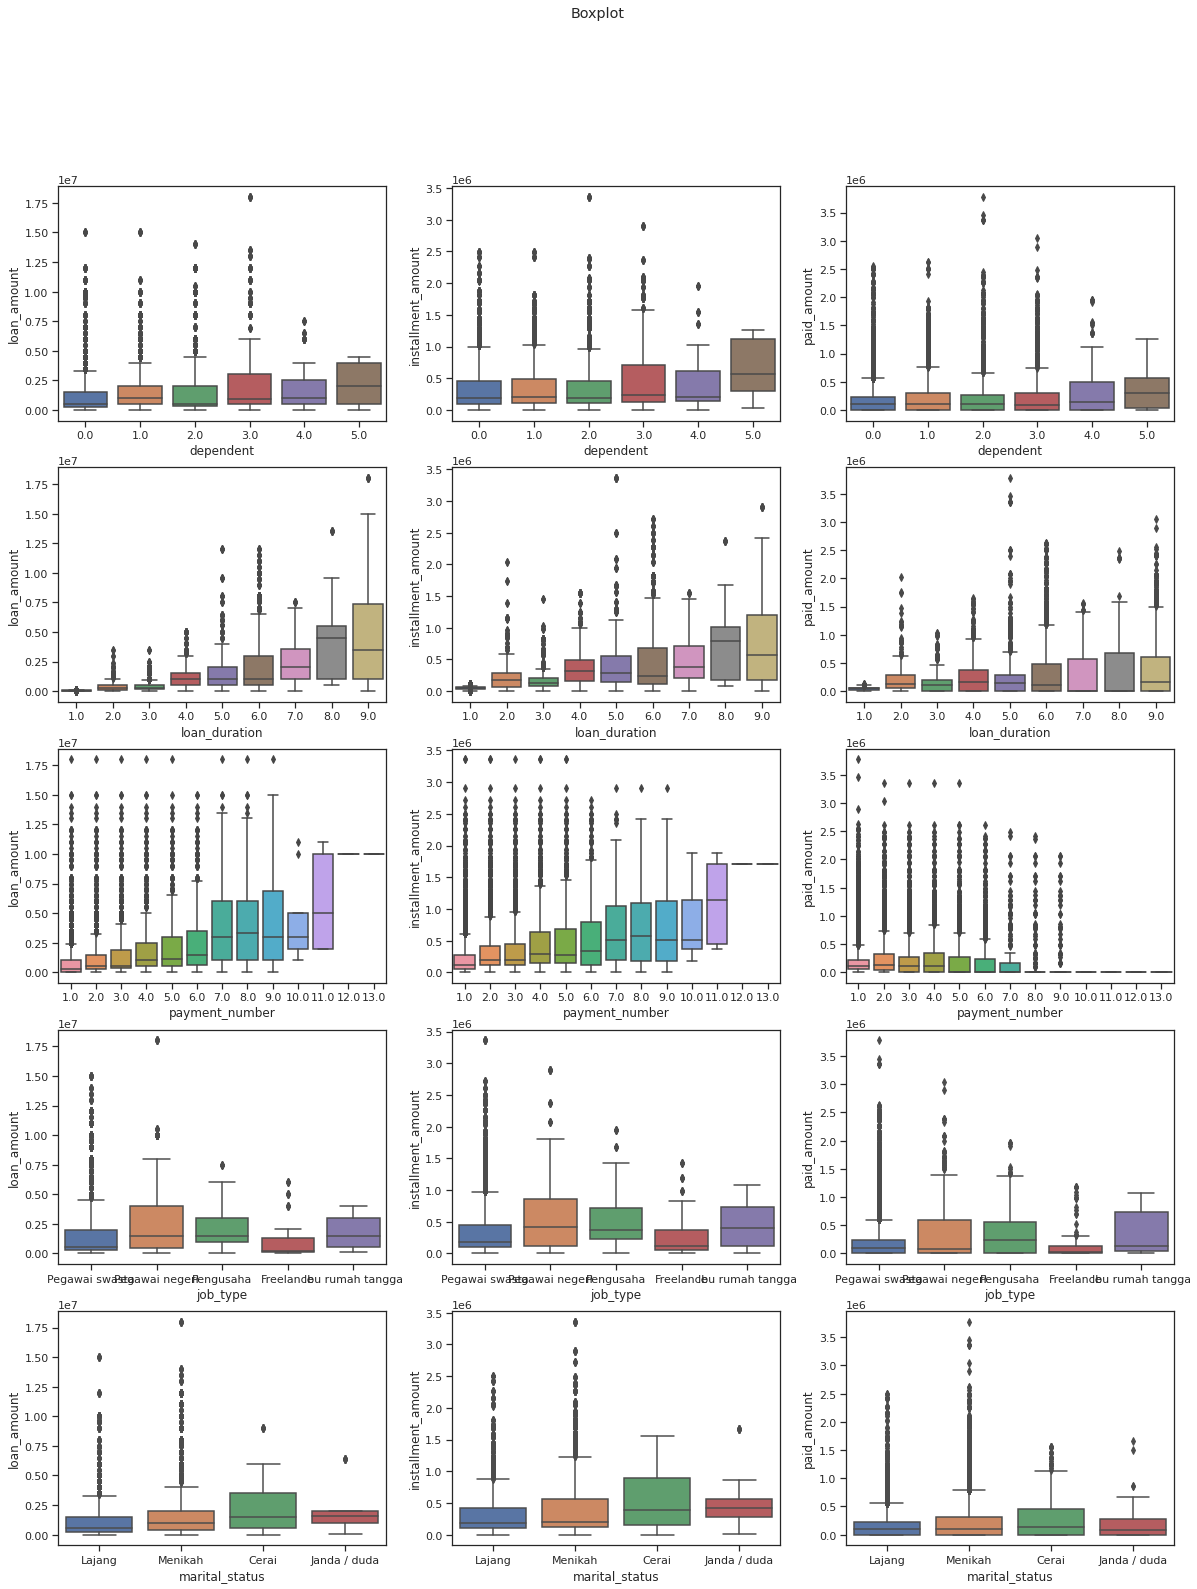

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(20, 25))

fig.suptitle('Boxplot')

sns.boxplot(ax=axes[0, 0], data=df_outlier, x='dependent', y='loan_amount')
sns.boxplot(ax=axes[0, 1], data=df_outlier, x='dependent', y='installment_amount')
sns.boxplot(ax=axes[0, 2], data=df_outlier, x='dependent', y='paid_amount')

sns.boxplot(ax=axes[1, 0], data=df_outlier, x='loan_duration', y='loan_amount')
sns.boxplot(ax=axes[1, 1], data=df_outlier, x='loan_duration', y='installment_amount')
sns.boxplot(ax=axes[1, 2], data=df_outlier, x='loan_duration', y='paid_amount')

sns.boxplot(ax=axes[2, 0], data=df_outlier, x='payment_number', y='loan_amount')
sns.boxplot(ax=axes[2, 1], data=df_outlier, x='payment_number', y='installment_amount')
sns.boxplot(ax=axes[2, 2], data=df_outlier, x='payment_number', y='paid_amount')

sns.boxplot(ax=axes[3, 0], data=df_outlier, x='job_type', y='loan_amount')
sns.boxplot(ax=axes[3, 1], data=df_outlier, x='job_type', y='installment_amount')
sns.boxplot(ax=axes[3, 2], data=df_outlier, x='job_type', y='paid_amount')

sns.boxplot(ax=axes[4, 0], data=df_outlier, x='marital_status', y='loan_amount')
sns.boxplot(ax=axes[4, 1], data=df_outlier, x='marital_status', y='installment_amount')
sns.boxplot(ax=axes[4, 2], data=df_outlier, x='marital_status', y='paid_amount')

In [ ]:
df_outlier

,cdate,application_id,customer_id,loan_purpose,dob,address_provinsi,marital_status,dependent,job_type,job_industry,...,loan_duration,installment_amount,fund_transfer_ts,payment_id,payment_number,due_date,due_amount,paid_date,paid_amount,dpd
0,2021-01-07,2004025695250,2003023548799,Modal usaha,2000-01-06,Banten,Lajang,1.0,Pegawai swasta,Admin / Finance / HR,...,5.0,140000.0,2021-01-24,2006022009983,1.0,2021-03-02,0.0,2021-04-02,149000.0,31.0
1,2021-01-07,2004025695250,2003023548799,Modal usaha,2000-01-06,Banten,Lajang,1.0,Pegawai swasta,Admin / Finance / HR,...,5.0,140000.0,2021-01-24,2006022009984,2.0,2021-04-02,0.0,2021-05-16,195000.0,44.0
2,2021-01-07,2004025695250,2003023548799,Modal usaha,2000-01-06,Banten,Lajang,1.0,Pegawai swasta,Admin / Finance / HR,...,5.0,140000.0,2021-01-24,2006022009985,3.0,2021-05-02,0.0,2021-05-30,140000.0,28.0
3,2021-01-07,2004025695250,2003023548799,Modal usaha,2000-01-06,Banten,Lajang,1.0,Pegawai swasta,Admin / Finance / HR,...,5.0,140000.0,2021-01-24,2006022009986,4.0,2021-06-02,0.0,2021-07-06,140000.0,34.0
4,2021-01-07,2004025695250,2003023548799,Modal usaha,2000-01-06,Banten,Lajang,1.0,Pegawai swasta,Admin / Finance / HR,...,5.0,140000.0,2021-01-24,2006022009987,5.0,NaT,0.0,2021-08-02,140000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,2021-03-24,2004026221387,2003023660704,Kebutuhan sehari-hari,1997-09-22,None,Lajang,0.0,Pegawai swasta,Kesehatan,...,4.0,95000.0,2022-02-01,2006055587457,3.0,2022-05-30,95000.0,NaT,0.0,0.0
15077,2021-03-24,2004026221387,2003023660704,Kebutuhan sehari-hari,1997-09-22,None,Lajang,0.0,Pegawai swasta,Kesehatan,...,4.0,95000.0,2022-02-01,2006055587458,4.0,2022-06-30,95000.0,NaT,0.0,0.0
15078,2021-03-24,2004026221387,2003023660704,Kebutuhan sehari-hari,1997-09-22,None,Lajang,0.0,Pegawai swasta,Kesehatan,...,3.0,81000.0,2022-02-14,2006057339878,1.0,2022-03-30,85000.0,NaT,0.0,0.0
15079,2021-03-24,2004026221387,2003023660704,Kebutuhan sehari-hari,1997-09-22,None,Lajang,0.0,Pegawai swasta,Kesehatan,...,3.0,81000.0,2022-02-14,2006057339879,2.0,2022-04-30,0.0,NaT,0.0,0.0


**RESCALING THE DATA**
Di sini kita akan mengubah skala data sehingga outlier masih dapat digunakan. Meskipun pada tahap selanjutnya kita akan melakukan remove outlier, setidaknya tidak terlalu banyak data yang terbuang.

In [ ]:
# df_outlier['loan_amount'] = [np.log(x) for x in df_outlier['loan_amount']]
# df_outlier['installment_amount'] = [np.log(x) for x in df_outlier['installment_amount']]
# df_outlier['paid_amount'] = [np.log(x) for x in df_outlier['paid_amount']]

In [ ]:
# df_outlier

**REMOVE OUTLIER**
Meskipun kita sudah melakukan rescaling data, tetapi kita masih perlu mengecek apakah outlier sudah hilang/belum. Rescaling data tujuannya untuk "mereduce/meminimalkan" jumlah outlier, bukan untuk menghilangkan outlier.

In [ ]:
df=df_outlier
########## DETECTING OUTLIERS USING IQR ###############
Q1_1 = df.loan_amount.quantile(0.25)
Q3_1 = df.loan_amount.quantile(0.75)
print(Q1_1,Q3_1)

IQR_1 = Q3_1-Q1_1
print(IQR_1)

lower_limit_1 = Q1_1 - 1.5*IQR_1
upper_limit_1 = Q3_1 + 1.5*IQR_1
print(lower_limit_1,upper_limit_1)

#########################################################
Q1_2 = df.installment_amount.quantile(0.25)
Q3_2 = df.installment_amount.quantile(0.75)
print(Q1_2,Q3_2)

IQR_2 = Q3_2-Q1_2
print(IQR_2)

lower_limit_2 = Q1_2 - 1.5*IQR_2
upper_limit_2 = Q3_2 + 1.5*IQR_2
print(lower_limit_2,upper_limit_2)

#########################################################
Q1_3 = df.paid_amount.quantile(0.25)
Q3_3 = df.paid_amount.quantile(0.75)
print(Q1_3,Q3_3)

IQR_3 = Q3_3-Q1_3
print(IQR_3)

lower_limit_3 = Q1_3 - 1.5*IQR_3
upper_limit_3 = Q3_3 + 1.5*IQR_3
print(lower_limit_3,upper_limit_3)

df2 = df[(df['loan_amount']<lower_limit_1) | (df['loan_amount']>upper_limit_1) | (df['installment_amount']<lower_limit_2) | (df['installment_amount']>upper_limit_2) | (df['paid_amount']<lower_limit_3) | (df['paid_amount']>upper_limit_3)]
print("Number of Outliers Detected:",df2.shape[0])
df2

303000.0 2000000.0
1697000.0
-2242500.0 4545500.0
108000.0 493000.0
385000.0
-469500.0 1070500.0
0.0 280000.0
280000.0
-420000.0 700000.0
Number of Outliers Detected: 2138


,cdate,application_id,customer_id,loan_purpose,dob,address_provinsi,marital_status,dependent,job_type,job_industry,...,loan_duration,installment_amount,fund_transfer_ts,payment_id,payment_number,due_date,due_amount,paid_date,paid_amount,dpd
18,2021-01-14,2004025736661,2003023567116,Modal usaha,1986-07-22,Banten,Menikah,2.0,Pegawai swasta,Admin / Finance / HR,...,6.0,793000.0,2021-01-15,2006021973835,1.0,2021-02-01,0.0,2021-02-15,702000.0,14.0
19,2021-01-14,2004025736661,2003023567116,Modal usaha,1986-07-22,Banten,Menikah,2.0,Pegawai swasta,Admin / Finance / HR,...,6.0,793000.0,2021-01-15,2006021973836,2.0,2021-03-01,0.0,2021-02-26,793000.0,-3.0
20,2021-01-14,2004025736661,2003023567116,Modal usaha,1986-07-22,Banten,Menikah,2.0,Pegawai swasta,Admin / Finance / HR,...,6.0,793000.0,2021-01-15,2006021973837,3.0,2021-04-01,0.0,2021-05-15,975000.0,44.0
24,2021-01-14,2004025736661,2003023567116,Modal usaha,1986-07-22,Banten,Menikah,2.0,Pegawai swasta,Admin / Finance / HR,...,4.0,620000.0,NaT,2006022049992,2.0,2021-04-01,0.0,2021-05-15,1048000.0,44.0
34,2021-02-07,2004025885365,2003023442469,Kebutuhan sehari-hari,NaT,None,Lajang,0.0,Pegawai swasta,Pabrik / Gudang,...,9.0,2053000.0,2021-02-08,2006022063930,1.0,2021-03-03,0.0,2021-03-30,1885000.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15054,2021-03-24,2004026221387,2003023660704,Kebutuhan sehari-hari,1997-09-22,None,Lajang,0.0,Pegawai swasta,Kesehatan,...,6.0,906000.0,2021-03-24,2006022252435,2.0,NaT,0.0,2021-06-29,906000.0,0.0
15055,2021-03-24,2004026221387,2003023660704,Kebutuhan sehari-hari,1997-09-22,None,Lajang,0.0,Pegawai swasta,Kesehatan,...,6.0,906000.0,2021-03-24,2006022252436,3.0,2021-06-30,0.0,2021-07-30,906000.0,30.0
15056,2021-03-24,2004026221387,2003023660704,Kebutuhan sehari-hari,1997-09-22,None,Lajang,0.0,Pegawai swasta,Kesehatan,...,6.0,906000.0,2021-03-24,2006022252437,4.0,2021-07-30,0.0,2021-08-29,906000.0,30.0
15057,2021-03-24,2004026221387,2003023660704,Kebutuhan sehari-hari,1997-09-22,None,Lajang,0.0,Pegawai swasta,Kesehatan,...,6.0,906000.0,2021-03-24,2006022252438,5.0,2021-08-30,0.0,2021-09-30,906000.0,31.0


<AxesSubplot:ylabel='installment_amount'>

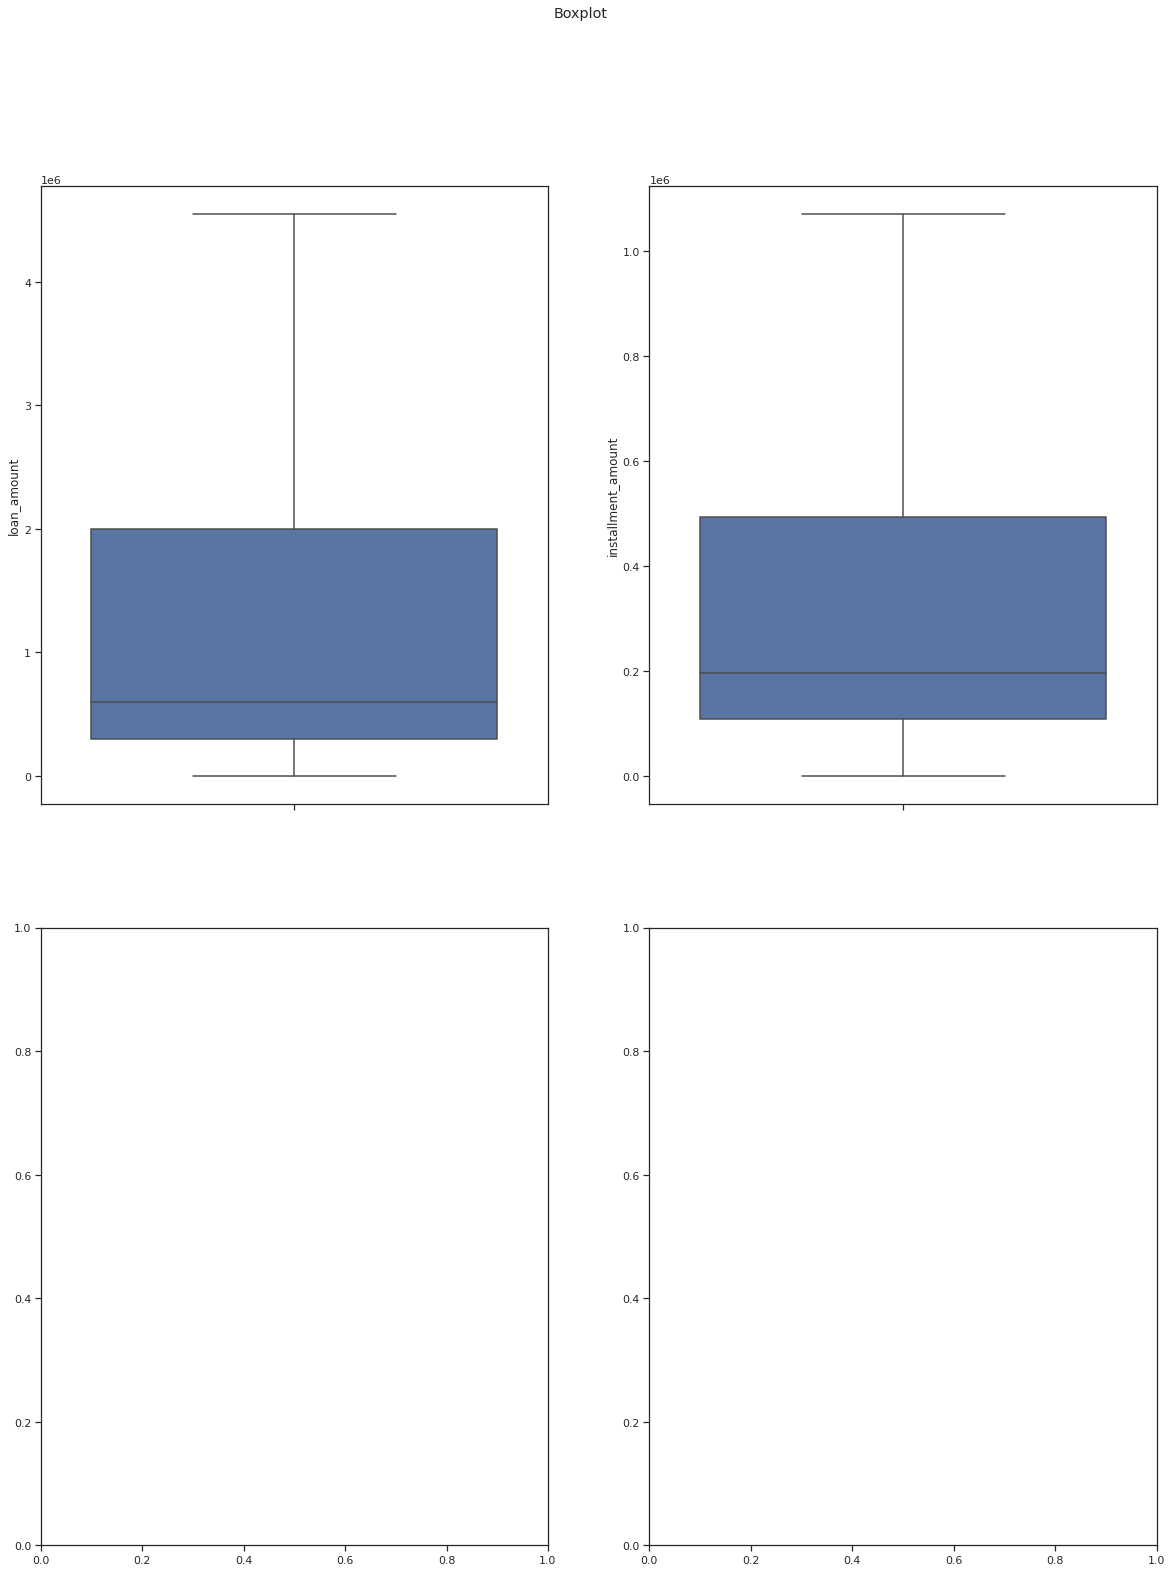

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 25))
df_clean = df_outlier
df_clean['loan_amount'] = np.where(df_clean['loan_amount']>upper_limit_1,upper_limit_1,df_clean['loan_amount'])
df_clean['loan_amount'] = np.where(df_clean['loan_amount']<lower_limit_1,lower_limit_1,df_clean['loan_amount'])

df_clean['installment_amount'] = np.where(df_clean['installment_amount']>upper_limit_2,upper_limit_2,df_clean['installment_amount'])
df_clean['installment_amount'] = np.where(df_clean['installment_amount']<lower_limit_2,lower_limit_2,df_clean['installment_amount'])
fig.suptitle('Boxplot')

sns.boxplot(ax=axes[0, 0], data=df_clean, orient='v', y='loan_amount')
sns.boxplot(ax=axes[0, 1], data=df_clean, orient='v', y='installment_amount')

### Assignment 2 - Label analysis

Please do all these analysis in SQL query.
1. We don't want to give credit to `bad` customers (customers that don't pay at all). Can you define what a `bad` customers is from the dataset provided and what is the earliest indicator to say that a customer is `bad`?
2. Based on the label that you defined, what kind of trends do you see in the data that distinguish good and bad customers?
3. Arrange customers by “loan amount” in ascending order and provide cumulative default rates by equal-sized deciles. Each decile should have:
> a. Number of loans <br>
> b. Number of defaulted loans <br>
> c. The default rate for each decile <br>
> d. Cumulative default rate <br>
> e. Min, max, avg “loan amount” <br>

In [ ]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
from six import StringIO
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, ConfusionMatrixDisplay
# ​from category_encoders import BinaryEncoder
import category_encoders as ce
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()
seed = 42
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Insert data from pd.DataFrame to SQL Alchemy Engine
df_clean.to_sql(name='df_clean', con=engine,if_exists='replace')

In [ ]:
# customer_type with a value of 0 is a bad customer while a value of 1 is a good customer
df_label = """
    WITH table_1 as (
      SELECT dc.cdate,
          dc.customer_id,
          dc.loan_id,
          dc.loan_purpose,
          dc.address_provinsi,
          dc.marital_status,
          dc.dependent,
          dc.job_type,
          dc.job_industry,
          count (distinct dc.loan_id) as jumlah_pinjaman,
          sum(dc.loan_amount) as total_pinjaman,
          avg(dc.loan_duration) avg_durasi_pinjaman,
          -- dc.installment_amount,
          sum(dc.due_amount) as total_jatuh_tempo,
          count(dc.due_date) as jumlah_due_date,
          count(dc.paid_date) as jumlah_paid_date,
          sum(dc.paid_amount) as total_dibayar
        --  CASE WHEN due_date is not null and paid_date is null then 0 else 1 end as customer_type
    FROM df_clean dc
    group by 1,2,3,4,5,6,7,8,9
    order by 1)

      SELECT cdate,
          customer_id,
          loan_id,
          loan_purpose,
          address_provinsi,
          marital_status,
          dependent,
          job_type,
          job_industry,
          jumlah_pinjaman,
          total_pinjaman,
          avg_durasi_pinjaman,
          -- dc.installment_amount,
          total_jatuh_tempo,
          total_dibayar,
          CASE WHEN jumlah_due_date !=0 and jumlah_paid_date = 0 then 0 else 1 end as bad_good_cust
          FROM table_1
"""
df_label=pd.read_sql_query(df_label, engine)

In [ ]:
#DECILE
df_decile = """
WITH
decile AS
(
SELECT
NTILE(10) OVER (ORDER BY loan_amount) AS decile,
*
FROM
df_clean
)
SELECT customer_id,
count(distinct loan_id) as number_of_loan,
min(loan_amount) as min_loan_amount,
max(loan_amount) as max_loan_amount,
avg(loan_amount) as avg_loan_amount
FROM decile
where decile = 1
group by 1
"""
df_decile=pd.read_sql_query(df_decile, engine)
df_decile

,customer_id,number_of_loan,min_loan_amount,max_loan_amount,avg_loan_amount
0,2003020290264,4,0.0,53158.0,7594.000000
1,2003020300323,1,21579.0,21579.0,21579.000000
2,2003020308160,2,21579.0,23947.0,22763.000000
3,2003020454657,1,0.0,0.0,0.000000
4,2003020458790,1,25874.0,25874.0,25874.000000
...,...,...,...,...,...
147,2003024999245,2,52905.0,53000.0,52952.500000
148,2003025035837,2,53684.0,53684.0,53684.000000
149,2003025092572,115,0.0,53158.0,51979.252174
150,2003025128338,3,0.0,52308.0,26154.333333


,absolute,percent
1,4028,88.22
0,538,11.78


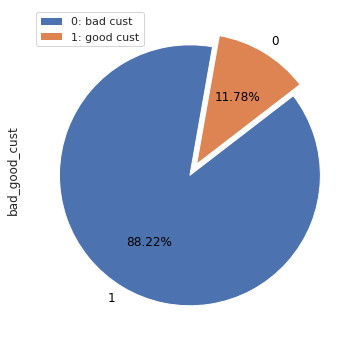

In [ ]:
# Checking data balance/proportion
loan = df_label.bad_good_cust.value_counts().to_frame().rename(columns={"bad_good_cust":"absolute"})
loan["percent"] = (loan.apply(lambda x: x/x.sum()*100).round(2))
display(loan)

# Pie Chart
df_label.bad_good_cust.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: bad cust","1: good cust"]);

Data tidak seimbang: target memiliki 11,78% bad_cust (nilai 0) dibandingkan 88,22% good_cust (nilai 1)

In [ ]:
# CHECK MISSING VALUE
nulval = df_label.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent
cdate,600,17.44
customer_id,0,0.00
loan_id,1,0.03
loan_purpose,598,17.38
address_provinsi,384,11.16
marital_status,499,14.51
dependent,539,15.67
job_type,416,12.09
job_industry,313,9.10
jumlah_pinjaman,0,0.00


In [ ]:
# General statistics
def stats(x):
    print(f"Variable: {x}")
    print(f"Type of variable: {df_label[x].dtype}")
    print(f"Total observations: {df_label[x].shape[0]}")
    detect_null_val = df_label[x].isnull().values.any()
    if detect_null_val:
        print(f"Missing values: {df_label[x].isnull().sum()} ({(df_label[x].isnull().sum() / df_label[x].isnull().shape[0] *100).round(2)}%)")
    else:
        print(f"Missing values? {df_label[x].isnull().values.any()}")
    print(f"Unique values: {df_label[x].nunique()}")
    if df_label[x].dtype != "O":
        print(f"Min: {int(df_label[x].min())}")
        print(f"25%: {int(df_label[x].quantile(q=[.25]).iloc[-1])}")
        print(f"Median: {int(df_label[x].median())}")
        print(f"75%: {int(df_label[x].quantile(q=[.75]).iloc[-1])}")
        print(f"Max: {int(df_label[x].max())}")
        print(f"Mean: {df_label[x].mean()}")
        print(f"Std dev: {df_label[x].std()}")
        print(f"Variance: {df_label[x].var()}")
        print(f"Skewness: {scipy.stats.skew(df_label[x])}")
        print(f"Kurtosis: {scipy.stats.kurtosis(df_label[x])}")
        print("")

In [ ]:
stats("jumlah_pinjaman")

Variable: jumlah_pinjaman
Type of variable: int64
Total observations: 4566
Missing values? False
Unique values: 2
Min: 0
25%: 1
Median: 1
75%: 1
Max: 1
Mean: 0.9997809899255365
Std dev: 0.01479898896760942
Variance: 0.00021901007446342534
Skewness: -67.54998311663779
Kurtosis: 4561.000219058051



In [ ]:
df_label_2 = df_label.copy()
df_label['dependent'] = pd.Categorical(df_label['dependent']).codes
df_label['marital_status'] = pd.Categorical(df_label['marital_status']).codes
df_label['job_type'] = pd.Categorical(df_label['job_type']).codes
df_label['job_industry'] = pd.Categorical(df_label['job_industry']).codes
df_label['loan_purpose'] = pd.Categorical(df_label['loan_purpose']).codes
df_label['address_provinsi'] = pd.Categorical(df_label['address_provinsi']).codes
# df_label['loan_duration'] = pd.Categorical(df_label['loan_duration']).codes

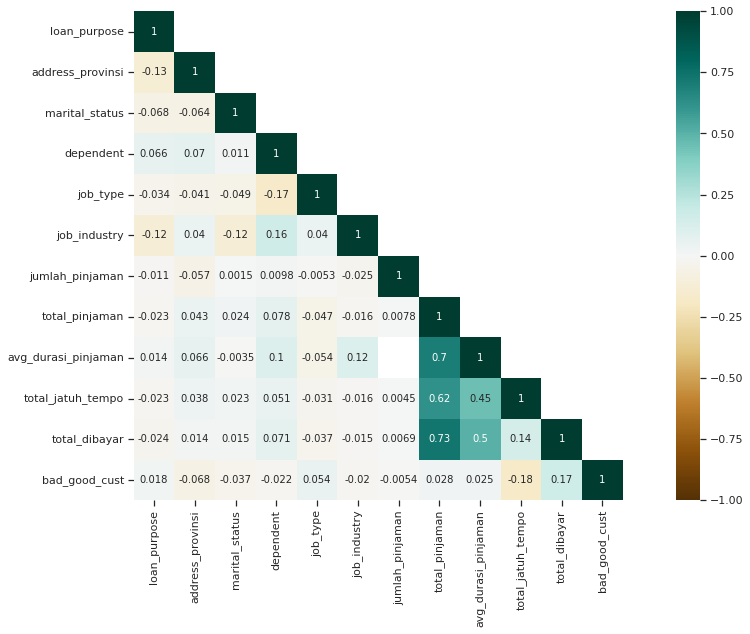

In [ ]:
mask = np.triu(df_label.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(df_label.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

Heatmap menunjukkan ada beberapa korelasi positif dan negatif antar variabel.

### Assignment 3 - Feature Engineering

Based on your findings in Assignment 2, please create features using SQL that you think could be predictive for a machine learning model.

Sekarang kita cari tahu fitur mana yang paling berkorelasi dengan target

In [ ]:
bad_good_cust = pg.pairwise_corr(df_label, columns=['bad_good_cust'], method='pearson').loc[:,['X','Y','r']]
bad_good_cust.sort_values(by=['r'], ascending=False)

,X,Y,r
10,bad_good_cust,total_dibayar,0.169073
4,bad_good_cust,job_type,0.053737
7,bad_good_cust,total_pinjaman,0.028040
8,bad_good_cust,avg_durasi_pinjaman,0.024547
0,bad_good_cust,loan_purpose,0.018327
6,bad_good_cust,jumlah_pinjaman,-0.005409
5,bad_good_cust,job_industry,-0.019561
3,bad_good_cust,dependent,-0.021551
2,bad_good_cust,marital_status,-0.036720
1,bad_good_cust,address_provinsi,-0.067700


In [ ]:
#Di sini kita mencari variabel independen mana yang saling memiliki korelasi tinggi (Autokorelasi)

data_spear = df_label.copy()
data_spear.drop(["bad_good_cust"], axis=1, inplace=True)

spearman_rank = pg.pairwise_corr(data_spear, method='spearman').loc[:,['X','Y','r']]
pos = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[:5,:]
neg = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[-5:,:]
con = pd.concat([pos,neg], axis=0)
display(con.reset_index(drop=True))

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


,X,Y,r
0,total_pinjaman,avg_durasi_pinjaman,0.890576
1,total_pinjaman,total_dibayar,0.714835
2,avg_durasi_pinjaman,total_dibayar,0.656855
3,avg_durasi_pinjaman,total_jatuh_tempo,0.477965
4,total_pinjaman,total_jatuh_tempo,0.436764
5,address_provinsi,job_type,-0.090368
6,marital_status,job_type,-0.124837
7,loan_purpose,address_provinsi,-0.141474
8,dependent,job_type,-0.172641
9,jumlah_pinjaman,avg_durasi_pinjaman,NaN


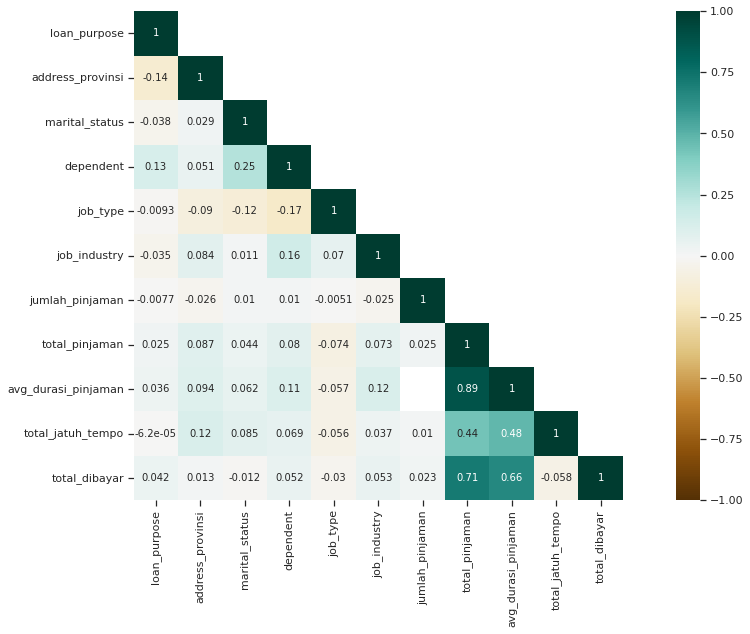

In [ ]:
# Autokorelasi divisualisasikan dalam bentuk heatmap
mask = np.triu(data_spear.corr(method='spearman'), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(data_spear.corr(method='spearman'), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

In [ ]:
df_label['loan_purpose'] = pd.Categorical(df_label.loan_purpose)
df_label['address_provinsi'] = pd.Categorical(df_label.address_provinsi)
df_label['marital_status'] = pd.Categorical(df_label.marital_status)
df_label['dependent'] = pd.Categorical(df_label.dependent)
df_label['job_type'] = pd.Categorical(df_label.job_type)
df_label['job_industry'] = pd.Categorical(df_label.job_industry)

In [ ]:
data_nu = df_label.select_dtypes(exclude=["object","category"]).copy()

Xnum = data_nu.drop(["bad_good_cust", "avg_durasi_pinjaman"], axis= "columns")
ynum = data_nu.bad_good_cust

In [ ]:
# Mengidentifikasi fitur prediktif menggunakan nilai p Pearson Correlation
pd.DataFrame(
    [scipy.stats.pearsonr(Xnum[col],
    ynum) for col in Xnum.columns],
    columns=["Pearson Corr.", "p-value"],
    index=Xnum.columns,
).round(4)

,Pearson Corr.,p-value
jumlah_pinjaman,-0.0054,0.7148
total_pinjaman,0.0280,0.0581
total_jatuh_tempo,-0.1763,0.0000
total_dibayar,0.1691,0.0000


karena variabel jumlah_pinjaman memiliki p-value > 0.05 maka variabel tersebut dieliminasi. Kita juga mengeliminasi variabel total_pinjaman karena memiliki autokorelasi terhadap variabel independen yang lain yaitu total_jatuh_tempo dan total_dibayar.

In [ ]:
data_nu = df_label.select_dtypes(exclude=["object","category"]).copy()

Xnum = data_nu.drop(["bad_good_cust", "avg_durasi_pinjaman", "jumlah_pinjaman","total_pinjaman"], axis= "columns")
ynum = data_nu.bad_good_cust

In [ ]:
# Mengidentifikasi fitur prediktif menggunakan nilai p Pearson Correlation
pd.DataFrame(
    [scipy.stats.pearsonr(Xnum[col],
    ynum) for col in Xnum.columns],
    columns=["Pearson Corr.", "p-value"],
    index=Xnum.columns,
).round(4)

,Pearson Corr.,p-value
total_jatuh_tempo,-0.1763,0.0
total_dibayar,0.1691,0.0


**Categorical Features and Categorical/Binary Target**

In [ ]:
Xcat = df_label.select_dtypes(exclude=['int64','float64','object']).copy()

In [ ]:
Xcat['target'] = df_label.bad_good_cust
Xcat.dropna(how="any", inplace=True)
ycat = Xcat.target
Xcat.drop("target", axis=1, inplace=True)

In [ ]:
## CHI SQUARE test

for col in Xcat.columns:
    table = pd.crosstab(Xcat[col], ycat)
    print()
    display(table)
    _, pval, _, expected_table = scipy.stats.chi2_contingency(table)
    print(f"p-value: {pval:.25f}")

target,0,1
loan_purpose,,
-1,59,539
0,0,13
1,41,293
2,3,8
3,47,251
4,91,549
5,16,65
6,29,159
7,2,16


p-value: 0.0000404733895378473827026



target,0,1
address_provinsi,,
-1,61,323
0,0,185
1,7,70
2,63,416
3,0,6
4,0,23
5,11,539
6,94,779
7,2,6


p-value: 0.0000000000000000000000000



target,0,1
marital_status,,
-1,49,450
0,5,72
1,1,15
2,191,1546
3,292,1945


p-value: 0.0636032636390897881950579



target,0,1
dependent,,
-1,47,492
0,191,1554
1,125,698
2,133,896
3,35,313
4,6,66
5,1,9


p-value: 0.0053762644501310066433297



target,0,1
job_type,,
-1,62,354
0,19,45
1,3,23
2,29,140
3,416,3393
4,9,73


p-value: 0.0000089144115133794634396



target,0,1
job_industry,,
-1,45,268
0,79,921
1,4,7
2,20,33
3,3,80
4,20,183
5,30,220
6,113,657
7,6,72


p-value: 0.0000000000000636291891887


### Assignment 4 - Data Visualization
Using the features you engineered in Assignment 3, could you visualize the data to show a business user that your features are useful?

<AxesSubplot:xlabel='job_industry', ylabel='count'>

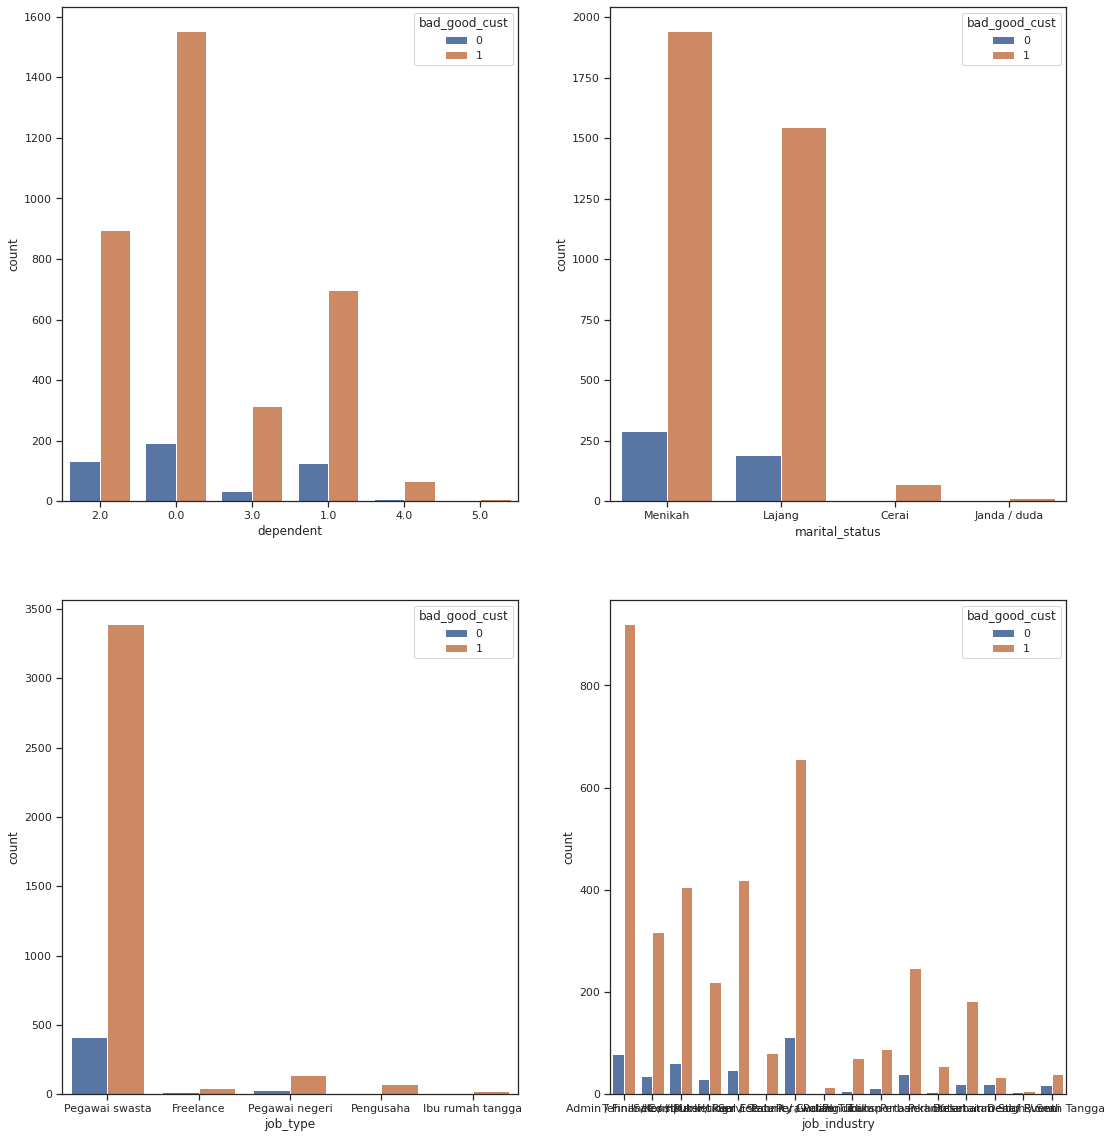

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 20))
sns.countplot(ax=axes[0, 0], data=df_label_2, x='dependent', hue=df_label_2.bad_good_cust)
sns.countplot(ax=axes[0, 1], data=df_label_2, x='marital_status', hue=df_label_2.bad_good_cust)
sns.countplot(ax=axes[1, 0], data=df_label_2, x='job_type', hue=df_label_2.bad_good_cust)
sns.countplot(ax=axes[1, 1], data=df_label_2, x='job_industry', hue=df_label_2.bad_good_cust)

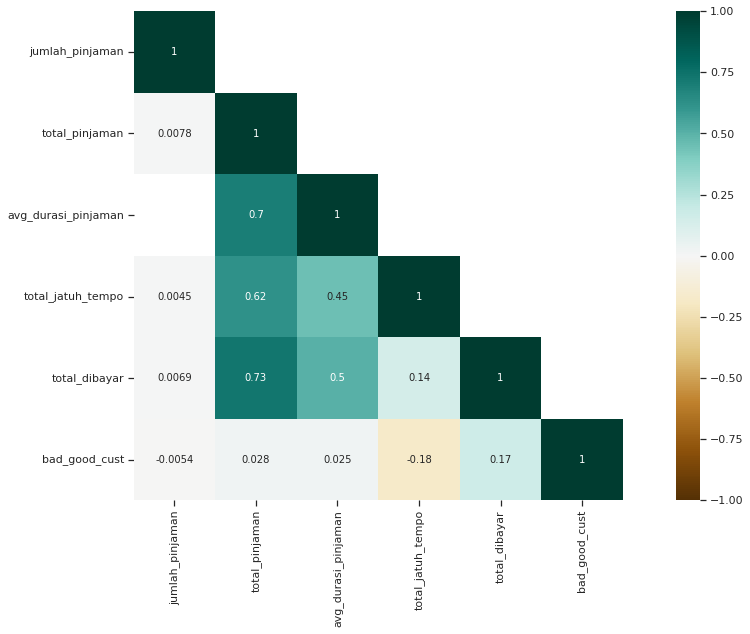

In [ ]:
mask = np.triu(df_label.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(df_label.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

### Assignment 5 - Modeling

1. Please build model(s) using the label and features that you have developed.
2. Which metrics do you use? and why?
3. Explain why your model can be considered as good enough.
4. How can the business use the model?
5. Could you provide which customers/loan we should avoid? Why?
6. If the business would like to achieve 2% cumulative default rate, which loans should we accept?
7. What are the characteristics of a defaulter, and how important are they?

**CREATE DUMMY VARIABLE**

In [ ]:
# df_analysis['job_type'] = df_analysis.job_type.astype('object')
# df_analysis['job_industry'] = df_analysis.job_industry.astype('object')
# df_analysis['dependent'] = df_analysis.dependent.astype('object')

In [ ]:
df_analysis=pd.get_dummies(df_label, columns=["loan_purpose","address_provinsi","marital_status","dependent","job_type","job_industry"])

**MACHINE LEARNING (PREDICTIVE MODELING)**

Mengingat kita memiliki data yang tidak seimbang, kita menggunakan AUC ROC untuk mengevaluasi performa model berikut.

In [ ]:
# ROC Curve: Area Under the Curve
def auc_roc_plot(y_test, y_preds):
    fpr, tpr, thresholds = roc_curve(y_test,y_preds)
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

**LOGISTIC REGRESSION**

In [ ]:
# Making a copy of the dataset
df_lr = df_analysis.copy()

# Dividing the dataset in train (80%) and test (20%)
train_set_lr, test_set_lr = train_test_split(df_lr, test_size = 0.3, random_state = seed)
X_train_lr = train_set_lr.drop(['bad_good_cust','cdate','loan_id','customer_id','avg_durasi_pinjaman','jumlah_pinjaman'], axis = 1)
y_train_lr = train_set_lr['bad_good_cust']
X_test_lr = test_set_lr.drop(['bad_good_cust','cdate','loan_id','customer_id','avg_durasi_pinjaman','jumlah_pinjaman'], axis = 1)
y_test_lr = test_set_lr['bad_good_cust']

# Normalizing the train and test data
scaler_lr = MinMaxScaler()
features_names = X_train_lr.columns
X_train_lr = scaler_lr.fit_transform(X_train_lr)
X_train_lr = pd.DataFrame(X_train_lr, columns = features_names)
X_test_lr = scaler_lr.transform(X_test_lr)
X_test_lr = pd.DataFrame(X_test_lr, columns = features_names)

lr = LogisticRegression(max_iter = 1000, solver = 'lbfgs', random_state = seed, class_weight = 'balanced' )
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
clf_lr = GridSearchCV(lr, parameters, cv = 5).fit(X_train_lr, y_train_lr)

In [ ]:
clf_lr
clf_lr.best_estimator_

LogisticRegression(C=100, class_weight='balanced', max_iter=1000,
                   random_state=42)

0.9504136099601417


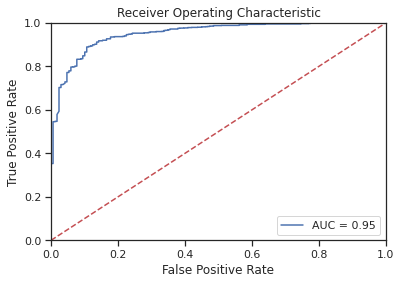

In [ ]:
y_preds_lr = clf_lr.predict_proba(X_test_lr)[:,1]
auc_roc_plot(y_test_lr, y_preds_lr)

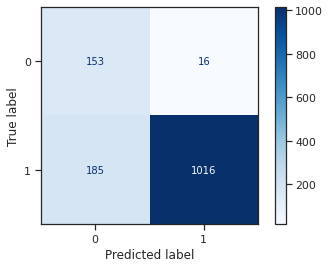

In [ ]:
# Confusion Matrix display
ConfusionMatrixDisplay.from_estimator(clf_lr, X_test_lr, y_test_lr, values_format=".4g", cmap="Blues");

# Creating assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test_lr == 1, y_preds_lr > 0.5).ravel()
tn_lr = tn
fp_lr = fp
fn_lr = fn
tp_lr = tp

In [ ]:
# Creating performance table
results_1 = {'Classifier': ['TN (%)','FP (%)','FN (%)','TP (%)'],
'Logistic Regression (LR)': [(tn_lr/1370*100).round(2), (fp_lr/1370*100).round(2), (fn_lr/1370*100).round(2), (tp_lr/1370*100).round(2)]}
results_1

{'Classifier': ['TN (%)', 'FP (%)', 'FN (%)', 'TP (%)'],
 'Logistic Regression (LR)': [11.17, 1.17, 13.5, 74.16]}

In [ ]:
# print classification report
print(classification_report(y_test_lr, y_preds_lr.round()))

              precision    recall  f1-score   support

           0       0.45      0.91      0.60       169
           1       0.98      0.85      0.91      1201

    accuracy                           0.85      1370
   macro avg       0.72      0.88      0.76      1370
weighted avg       0.92      0.85      0.87      1370



### Assignment 6

If you have had more time, what would you recommend to further improve the model and why?

1. Melakukan cross validation, untuk mendeteksi overfitting, misalnya gagal menggeneralisasi suatu pola.
2. Mencoba beberapa metode lain untuk perbandingan akurasi, seperti metode KNN, SVC, DT, RF, NN.
3. Ensemble Method, menggabungkan beberapa model menggunakan teknik Bagging (Bootstrap Aggregating)
dan Boosting.
4. Mencoba teknik imbalance data lainnya seperti Near Miss, SMOTE.

## Assignment 7
At JULO, we have 6 values that we follow, that are following our two core values:

![6 Core Values](julo_values.png)

A. Please choose three Core Values from the 6 values above that you think is your strength, share us one specific example where you showed it

1. We are critical : sebagai DS saya harus "kepo" ketika diberikan suatu permasalahan bisnis, kenapa bisa begini, kenapa datanya begini, dan masih banyak lagi pertanyaan yang harus saya cari tahu sendiri jawabannya, dan harus berpikir secara rasional menggunakan logika.
2. We are Effective Team Player : setiap projek yang saya kerjakan di OLX, selalu saya diskusikan bersama tim saya di luar jam meeting, kami sering 1o1 untuk saling bertukar pikiran dan meminta saran, kami juga melibatkan divisi lain yang bersangkutan untuk mempelajari datanya.
3. We are Responsible : saya selalu mendeliver projek sesuai deadline, dan jika terpaksa melebihi deadline, saya akan diskusikan terlebih dahulu dengan manager dan stakeholder.

B. Please choose three Core Values from the 6 values above that you think is your weakness, share us one specific example where you showed it

1. We Work Hard : kadang jika bekerja terlalu keras, fokus saya jadi agak terganggu karena merasa dikejar waktu. Tapi biasanya saya mengatasi hal tersebut dengan bertukar pikiran dengan rekan tim.

C. Please order the 6 Core Values based on your priority if you work at JULO and why

1. We are Responsible : karena menurut saya rasa "tanggung jawab" itu yang pertama harus ada sebelum saya mengeksekusi sebuah projek, saya harus berpacu pada speed dan akurasi agar pekerjaan bisa selesai sesuai deadline dan tentunya dengan hasil terbaik.